In [325]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [326]:
df = pd.read_csv('D:\AI_ML\AI-ML-Learning\Files\dirty_cafe_sales.csv')
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [328]:
df.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [329]:
df['Quantity'].describe()

count     9862
unique       7
top          5
freq      2013
Name: Quantity, dtype: object

In [330]:
df.isna().sum()

Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

#### Filling the NaN value for Item as Unknown

In [331]:
df['Item'].value_counts()
df['Item'] = df['Item'].fillna('UNKNOWN')

In [332]:
df['Item'].isna().sum()

0

#### Converting the object into the float and filling a nan value

In [333]:
df['Quantity'].unique()

array(['2', '4', '5', '3', '1', 'ERROR', 'UNKNOWN', nan], dtype=object)

In [334]:
df['Quantity'].value_counts()

Quantity
5          2013
2          1974
4          1863
3          1849
1          1822
UNKNOWN     171
ERROR       170
Name: count, dtype: int64

In [335]:
df['Quantity'].isna().sum()

138

In [336]:
df['Quantity'] = pd.to_numeric(df['Quantity'],errors='coerce')

In [337]:
df['Quantity'].value_counts()

Quantity
5.0    2013
2.0    1974
4.0    1863
3.0    1849
1.0    1822
Name: count, dtype: int64

In [338]:
df['Quantity'].unique()

array([ 2.,  4.,  5.,  3.,  1., nan])

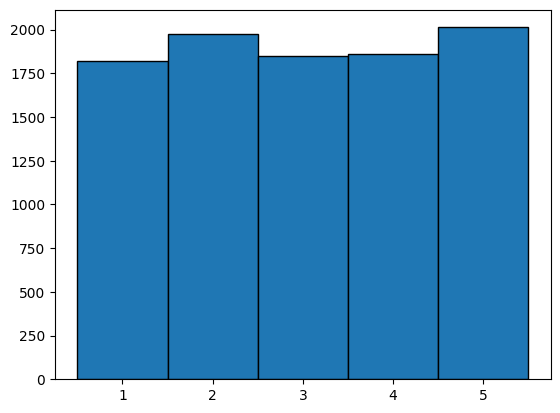

In [339]:
plt.hist(df['Quantity'].dropna(), bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black')
plt.xticks([1, 2, 3, 4, 5])
plt.show()

In [340]:
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mean())

In [341]:
df['Quantity'].isna().sum()

0

In [342]:
df.isna().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [343]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


#### For Price per unit

In [344]:
df['Price Per Unit'].value_counts()

Price Per Unit
3.0        2429
4.0        2331
2.0        1227
5.0        1204
1.0        1143
1.5        1133
ERROR       190
UNKNOWN     164
Name: count, dtype: int64

In [345]:
df['Price Per Unit'] = pd.to_numeric(df['Price Per Unit'].astype(str).str.replace(",",""), errors='coerce')

In [346]:
df['Price Per Unit'].unique()

array([2. , 3. , 1. , 5. , 4. , 1.5, nan])

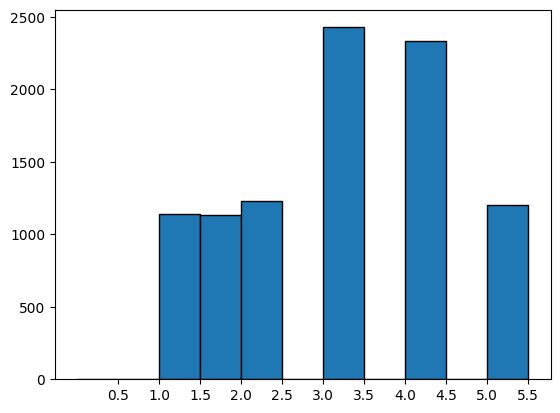

In [347]:
plt.hist(df['Price Per Unit'].dropna(), bins=[0,0.5,1, 1.5,2, 2.5,3, 3.5,4, 4.5,5, 5.5], edgecolor='black')
plt.xticks([0.5,1, 1.5,2, 2.5,3, 3.5,4, 4.5,5, 5.5])
plt.show()

In [348]:
df['Price Per Unit'] = df['Price Per Unit'].fillna(df['Price Per Unit'].mean())

In [349]:
df['Price Per Unit'].isna().sum()

0

In [350]:
df.isna().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [351]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


#### For the Total Spent

In [352]:
df['Total Spent'] = pd.to_numeric(df['Total Spent'].astype(str).str.replace(",",""), errors="coerce")

In [353]:
df['Total Spent'].unique()

array([ 4. , 12. ,  nan, 10. , 20. ,  9. , 16. , 15. , 25. ,  8. ,  5. ,
        3. ,  6. ,  2. ,  1. ,  7.5,  4.5,  1.5])

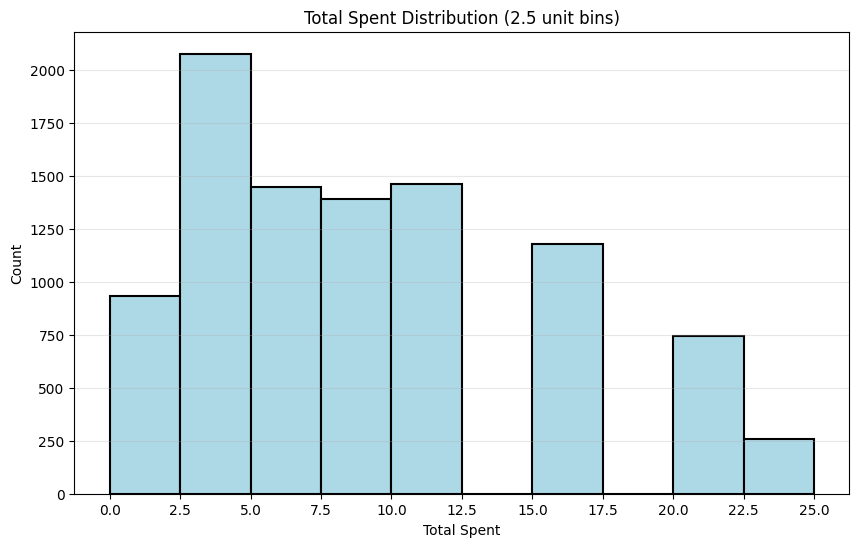

In [354]:
# With integer bins to group similar values
plt.figure(figsize=(10, 6))
plt.hist(df['Total Spent'].dropna(), 
         bins=np.arange(0, 26, 2.5),  # Bins every 2.5 units: [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25]
         edgecolor='black',
         color='lightblue',
         linewidth=1.5)
plt.title('Total Spent Distribution (2.5 unit bins)')
plt.xlabel('Total Spent')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.xticks(np.arange(0, 26, 2.5))
plt.show()

In [361]:
df['Total Spent'] = df['Total Spent'].fillna(df['Total Spent'].median())

In [356]:
df.isna().sum()

Transaction ID         0
Item                   0
Quantity               0
Price Per Unit         0
Total Spent            0
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

In [357]:
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,8.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11


#### Filling the missing value of Payment Method and Location

In [358]:
df['Payment Method'].value_counts()

Payment Method
Digital Wallet    2291
Credit Card       2273
Cash              2258
ERROR              306
UNKNOWN            293
Name: count, dtype: int64

In [359]:
df['Location'].value_counts()

Location
Takeaway    3022
In-store    3017
ERROR        358
UNKNOWN      338
Name: count, dtype: int64

In [360]:
df['Payment Method'] = df['Payment Method'].fillna('UNKNOWN')
df['Location'] = df['Location'].fillna('UNKNOWN')

In [362]:
df.isna().sum()

Transaction ID        0
Item                  0
Quantity              0
Price Per Unit        0
Total Spent           0
Payment Method        0
Location              0
Transaction Date    159
dtype: int64

#### For Date